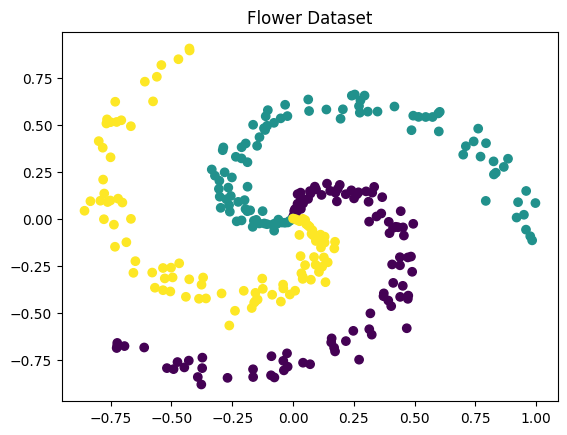

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_flower_data(samples_per_class=100, classes=3):
    np.random.seed(42)
    
    X = np.zeros((samples_per_class * classes, 2))
    y = np.zeros(samples_per_class * classes, dtype='uint8')

    for j in range(classes):
        ix = range(samples_per_class * j, samples_per_class * (j + 1))
        r = np.linspace(0.0, 1, samples_per_class)
        t = np.linspace(j * 4, (j + 1) * 4, samples_per_class) + np.random.randn(samples_per_class) * 0.2
        
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = generate_flower_data()

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.title("Flower Dataset")
plt.show()


In [2]:
print(X.shape, y.shape)

(300, 2) (300,)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 42)

In [5]:
X_train.shape

(210, 2)

In [6]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [7]:
def initialize_parameters(layer_dims):
    parameters = {}

    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))

    return parameters

In [9]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev)  + b
    linear_cache = (A_prev, W, b)
    return Z, linear_cache

In [15]:
def relu(Z):
    return (np.maximum(Z, 0), Z)
def sigmoid(Z):
    Z_shift = Z - np.max(Z, keep_dims = True, axis = 1)
    Z = np.exp(Z_shift)
    A = Z/np.sum(Z, keepdims = True, axis = 1)
    return (A, Z)

In [16]:
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation =='relu':
        A, activation_cache = relu(Z)
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
        cache = (linear_cache, activation_cache)
    return A
    

In [17]:
def L_model_forward(X, parameters):
    A_prev = X
    caches = []
    for l in range(1, L):
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)] + parameters['b'+str(l)], 'relu')
        A_prev = A
        caches.append(cache)
    
        
    AL, cache = linear_activation_forward(A_prev, parameters['W'+str(L)] + parameters['b'+str(L)], 'sigmoid')
     
    caches.append(cache)   
    return AL, caches

In [19]:
def compute_cost(AL, Y):
    return np.sum(Y*np.log(AL))/m
    